**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challange 3

`By Shafira Laksitasari`

## Description
I am a member of the Data Science team at the Austin Smart City and are working on a project to analyze the city's waste management and disposal systems. As a team member, based on the available data, try to analyze the data using descriptive and inferential statistics, and provide insight to the city of Austin regarding the state of the waste disposal and management system.

### Objective
In this graded challenge, data is accessed using bigquery-public-data on Google Cloud Big Query. Open Google Cloud Platform, log in to BigQuery, then open the bigquery-public-data tab or click the following link : https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=austin_waste&t=waste_and_diversion&page=table. Continue with predefined dataset usage direction on : https://github.com/H8-Assignments-Bay/p0---ftds014---g3-ShafiraLaksitasari. 
1. Before performing calculations and statistical analysis, perform data cleaning first. Make sure there are no missing values, etc.
2. Next, do a simple data exploration to find out and recognize the data you have. You can do the following to explore your data.
3. Based on the central tendency (mean, median, and mode) for each site, what insights/information can you convey to the city government? (Caution: Don't use pd.DataFrame.describe())
4. Choose the site that interests you the most, and give a reason.
5. Use the site you choose to check whether the load_weight data has outliers or not. Use the right technique according to the distribution of the data!. If so, what is the percentage of the number of outliers? and compare the central tendency of data that has outliers removed with those that have not (the result of calculation number 3).
6. Use the site you have selected to calculate the range, variance, and standard deviation for the load_weight data. Provide insight from the results of your calculations to the city government (Make sure the data used is data that has been cleaned of outliers).
7. The city government plans to add a new site. Provide analysis and suggestions regarding the amount of storage capacity at the new site based on the calculation of the confidence interval. What data do you use, is it only from one site or from the whole site?
8. Make a hypothesis test analysis of the data from the available data (the case is acquitted). Define H0 and H1 and perform calculations using a t-test that matches your hypothesis. Write the conclusion from your calculation to the city government (Remember! the city government doesn't understand p-value, hypothesis is accepted/not accepted).
9. Draw a common thread and draw conclusions from the calculations and analyzes you have done in the previous steps. Share your conclusions with the city government and avoid technical language that non-data scientists don't understand!

### Problem Statement.
3. Based on the central tendency (mean, median, and mode) for each site, what insights/information can you convey to the city government?
4. Choosing the site that interestsing the most, and give a reason.
5. Checking whether the load_weight data has outliers or not. Use the right technique according to the distribution of the data. If so, what is the percentage of the number of outliers? and compare the central tendency of data that has outliers removed with those that have not.
6. Use the to calculate the range, variance, and standard deviation for the load_weight data. Provide insight from the results of the calculations to the city government.
7. Providinh analysis and suggestions regarding the amount of storage capacity at the new site based on the calculation of the confidence interval. What data do we use, is it only from one site or from the whole site?
8. Make a hypothesis test analysis of the data from the available data (the case is acquitted). Write the conclusion from your calculation to the city government.
9. Drawing a common thread and draw conclusions from the calculations and analyzes in the previous steps. 

## Working Area


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

Displaying head and tail from the dataset

In [2]:
df = pd.read_csv('/Users/shafiralaksitasari/Documents/Hacktiv8/Graded/Phase 0/p0---ftds014---g3-ShafiraLaksitasari/h8dsft_P0W3_shafira_laksitasari.ipynb.csv', na_values = 0.0)
df.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07T11:51:00Z,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11T12:31:00Z,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16T12:58:00Z,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10T11:21:00Z,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03T12:36:00Z,RECYCLING - COMINGLE,1700.0,MRF


In [3]:
df.tail()

,load_time,load_type,load_weight,dropoff_site
94887,2006-05-12T11:00:00Z,BRUSH,4000.0,ZILKER
94888,2006-05-13T08:30:00Z,BRUSH,4000.0,ZILKER
94889,2006-05-13T10:15:00Z,BRUSH,4000.0,ZILKER
94890,2006-05-13T01:00:00Z,BRUSH,4000.0,ZILKER
94891,2006-05-18T12:15:00Z,BRUSH,4000.0,ZILKER


#### 1. Before performing calculations and statistical analysis, we perform data cleaning first. 

Checking whether there are any missing values from the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94892 entries, 0 to 94891
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   load_time     94892 non-null  object 
 1   load_type     94892 non-null  object 
 2   load_weight   90129 non-null  float64
 3   dropoff_site  94892 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.9+ MB


There are null data on 'load_weight', we will delete those null data and set those into permanent.

In [5]:
df.dropna(inplace=True)
df

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07T11:51:00Z,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11T12:31:00Z,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16T12:58:00Z,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10T11:21:00Z,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03T12:36:00Z,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
94887,2006-05-12T11:00:00Z,BRUSH,4000.0,ZILKER
94888,2006-05-13T08:30:00Z,BRUSH,4000.0,ZILKER
94889,2006-05-13T10:15:00Z,BRUSH,4000.0,ZILKER
94890,2006-05-13T01:00:00Z,BRUSH,4000.0,ZILKER


From data above, the rows change from 94892 to 90276. This new row number equal with values for 90276 no-null from 'df.info()`, so there are no more null data. We can checking the total null from current df. 

In [6]:
df.isnull().sum()

load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

`Should we change the data type on 'load_time'  into date_time?` Yes

In [7]:
df["load_time"] = pd.to_datetime(df["load_time"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90129 entries, 0 to 94891
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   load_time     90129 non-null  datetime64[ns, UTC]
 1   load_type     90129 non-null  object             
 2   load_weight   90129 non-null  float64            
 3   dropoff_site  90129 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 3.4+ MB


Now after all set, we continue to the next steps.

#### 2. Next, doing a simple data exploration to find out and recognize the data we have.

In [9]:
df['load_weight'].sum()

482918271.0

In [10]:
df.sort_values(by='load_time', ascending=True)

,load_time,load_type,load_weight,dropoff_site
26375,2000-01-26 12:39:00+00:00,RECYCLING - PAPER,2940.0,MRF
53702,2004-08-30 01:26:00+00:00,RECYCLING - PAPER,8580.0,MRF
53635,2004-08-30 01:40:00+00:00,RECYCLING - COMINGLE,4580.0,MRF
19764,2004-10-01 01:00:00+00:00,RECYCLING - COMINGLE,3420.0,MRF
20901,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2940.0,MRF
...,...,...,...,...
54829,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,5280.0,MRF
48401,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,2700.0,MRF
22873,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,3500.0,MRF
23766,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,2900.0,MRF


Based on the result above, from period range of 2000 until 2021 in 90275 diversion process there are about 482918271 load of waste. There are several load type of the waste from the data, we can check the type from bar chart below. The bar chart showing the frequency of the diversion for each type from the value. The most load type to transport is Paper while the least are Organics and Christmas Tree

<AxesSubplot:title={'center':'Total number of diversion for each load type from 2000 - 2021'}>

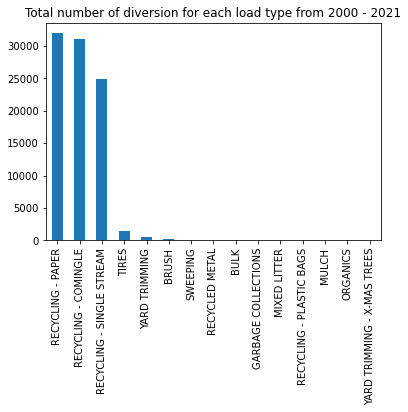

In [11]:
df["load_type"].value_counts().plot(kind="bar", x='load type', y='tot', title='Total number of diversion for each load type from 2000 - 2021')

In [12]:
df['load_type'].value_counts()

RECYCLING - PAPER              31954
RECYCLING - COMINGLE           31043
RECYCLING - SINGLE STREAM      24910
TIRES                           1469
YARD TRIMMING                    480
BRUSH                            187
SWEEPING                          26
RECYCLED METAL                    25
BULK                              17
GARBAGE COLLECTIONS                6
MIXED LITTER                       4
RECYCLING - PLASTIC BAGS           4
MULCH                              2
ORGANICS                           1
YARD TRIMMING - X-MAS TREES        1
Name: load_type, dtype: int64

Beside knowing which load type is the most mainstream, we also need to being inform that MRF is the most popular drop site or final destination for the waste. See from th value each of the sites below.

In [13]:
df['dropoff_site'].value_counts()

MRF       89456
ZILKER      656
WILCAB        9
ELMONT        5
KRAMER        3
Name: dropoff_site, dtype: int64

To digging more about each of the site, the data below showing the number of all load type which had been done in each site.

In [14]:
df.groupby(['dropoff_site','load_type'])['load_type'].count()

dropoff_site  load_type                  
ELMONT        SWEEPING                           5
KRAMER        RECYCLING - COMINGLE               1
              SWEEPING                           2
MRF           BRUSH                              1
              BULK                              17
              GARBAGE COLLECTIONS                1
              MIXED LITTER                       2
              MULCH                              2
              ORGANICS                           1
              RECYCLED METAL                    25
              RECYCLING - COMINGLE           31042
              RECYCLING - PAPER              31954
              RECYCLING - PLASTIC BAGS           4
              RECYCLING - SINGLE STREAM      24909
              SWEEPING                          13
              TIRES                           1469
              YARD TRIMMING                     16
WILCAB        MIXED LITTER                       2
              SWEEPING                  

Not all sites handle all kind of load_type. Later, we will investigate this situation.

#### 3. Based on the central tendency (mean, median, and mode) for each site, we need to find insight.

The mean, median, and mode for overall load weight. This overall CT only as information.

In [15]:
print ('The mean for overall load weight : ',df['load_weight'].mean())
print ('The median for overall load weight : ',df['load_weight'].median())
print ('The mode for overall load weight : ',df['load_weight'].mode())
print ('The Min for overall load weight : ' , df['load_weight'].min())
print ('The Max for overall load weight : ' , df['load_weight'].max())


The mean for overall load weight :  5358.078653929368
The median for overall load weight :  4280.0
The mode for overall load weight :  0    4000.0
Name: load_weight, dtype: float64
The Min for overall load weight :  20.0
The Max for overall load weight :  75000.0


In [16]:
df.groupby(by='dropoff_site')[['load_weight']].mean()
#.sort_values(by='load_weight', ascending=False)

,load_weight
dropoff_site,
ELMONT,15303.400000
KRAMER,11660.000000
MRF,5313.737893
WILCAB,11022.222222
ZILKER,11222.312500


In [17]:
df.groupby(by='dropoff_site')[['load_weight']].median()
#.sort_values(by='load_weight', ascending=False)

,load_weight
dropoff_site,
ELMONT,12560.0
KRAMER,11400.0
MRF,4260.0
WILCAB,10380.0
ZILKER,15000.0


The mean identifies the average load weight for each site, while the median indicates a limit to the load weight at each site. To compare them mostly, the median is smaller than the mean except for Zilker

In [18]:
df.groupby(['dropoff_site'])['load_weight'].max()

dropoff_site
ELMONT    31857.0
KRAMER    19600.0
MRF       27320.0
WILCAB    24060.0
ZILKER    75000.0
Name: load_weight, dtype: float64

In [19]:
df.groupby(['dropoff_site'])['load_weight'].min()

dropoff_site
ELMONT    5480.0
KRAMER    3980.0
MRF         20.0
WILCAB    2100.0
ZILKER    1000.0
Name: load_weight, dtype: float64

In [20]:
# save in case needed
# df.groupby(['dropoff_site'])['load_weight'].max()


As for mode, it is a bit hard to input it in the table since some of the site has multiple mode. The data below showing the load weight mode on every site. Some of the site such as ELMONT, KRAMER, and WILCAB only perform less than 10 diversion with the amount of load weight different in each unlike MRF and ZILKER proved by value counts. Both MRF and ZILKER perform several diversion (about 856 and 89456) which made them has mode.

In [21]:
df.groupby('dropoff_site').load_weight.apply(lambda x: x.mode())

dropoff_site   
ELMONT        0     5480.0
              1    11720.0
              2    12560.0
              3    14900.0
              4    31857.0
KRAMER        0     3980.0
              1    11400.0
              2    19600.0
MRF           0     3460.0
WILCAB        0     2100.0
              1     3780.0
              2     6360.0
              3     9880.0
              4    10380.0
              5    11800.0
              6    13560.0
              7    17280.0
              8    24060.0
ZILKER        0    15000.0
Name: load_weight, dtype: float64

Overall, the mode for load weight is 4000 but those result is not split yet between MRF and ZILKER. If we split them, the amount of 4000 load is only 156 and 283 competed with 286 (15000 load weight in ZILKER) and 352 (3460 load weight in MRF).

In [22]:
df[(df['dropoff_site'] == 'ZILKER') & (df['load_weight'] == 4000)].shape

(157, 4)

In [23]:
df[(df['dropoff_site'] == 'MRF') & (df['load_weight'] == 4000)].shape

(284, 4)

In [24]:
df[(df['dropoff_site'] == 'ZILKER') & (df['load_weight'] == 15000)].shape

(287, 4)

In [25]:
df[(df['dropoff_site'] == 'ELMONT')].sort_values(by='load_weight', ascending = True)

,load_time,load_type,load_weight,dropoff_site
89937,2005-04-27 03:36:00+00:00,SWEEPING,5480.0,ELMONT
89938,2014-01-22 07:45:00+00:00,SWEEPING,11720.0,ELMONT
89940,2007-08-09 10:08:00+00:00,SWEEPING,12560.0,ELMONT
89941,2007-08-09 12:34:00+00:00,SWEEPING,14900.0,ELMONT
90084,2008-04-10 10:20:00+00:00,SWEEPING,31857.0,ELMONT


In [26]:
df[(df['dropoff_site'] == 'MRF') & (df['load_weight'] == 3460)].shape

(353, 4)

Those mode above only showing based on the load weight. As for the most load type in each site we can see from the data below

In [27]:
df.groupby(['dropoff_site'])['load_type'].agg(pd.Series.mode)

dropoff_site
ELMONT             SWEEPING
KRAMER             SWEEPING
MRF       RECYCLING - PAPER
WILCAB             SWEEPING
ZILKER        YARD TRIMMING
Name: load_type, dtype: object

In [28]:
from matplotlib import pyplot as plt

In [29]:
df[(df['dropoff_site'] == 'MRF')].mean()

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_3980/3900198779.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[(df['dropoff_site'] == 'MRF')].mean()
/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_3980/3900198779.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df['dropoff_site'] == 'MRF')].mean()


load_weight    5313.737893
dtype: float64

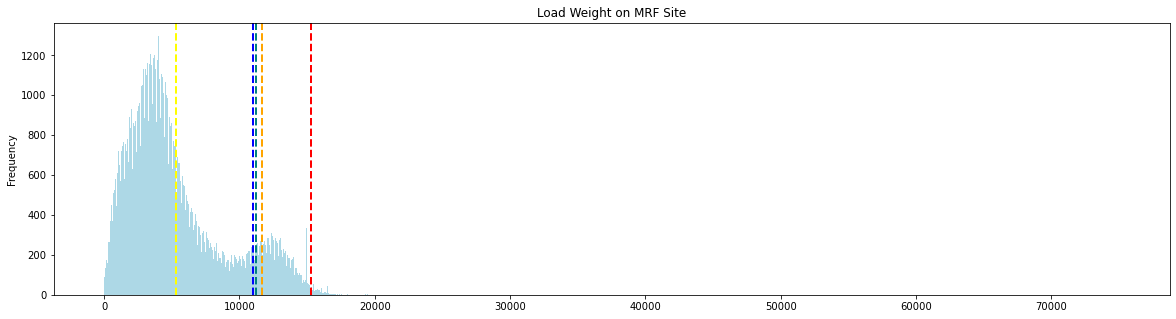

In [30]:
df_mmmmm =df['load_weight']
df_mmmmm.plot.hist(title='Load Weight on MRF Site', color='lightblue', bins=1000, figsize=(20,5)) #there are 100 grouping 
#plt.axvline(df_mmmmm.mean(), color='magenta', linestyle='dashed', linewidth=2)
#plt.axvline(df_mmmmm.median(), color='green', linestyle='dashed', linewidth=2)

df_1 = df[(df['dropoff_site'] == 'ELMONT')]
df_2 = df[(df['dropoff_site'] == 'KRAMER')]
df_3 = df[(df['dropoff_site'] == 'MRF')]
df_4 = df[(df['dropoff_site'] == 'WILCAB')]
df_5 = df[(df['dropoff_site'] == 'ZILKER')]

df_1_lw = df_1['load_weight']
df_2_lw = df_2['load_weight']
df_3_lw = df_3['load_weight']
df_4_lw = df_4['load_weight']
df_5_lw = df_5['load_weight']


plt.axvline(df_1_lw.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_2_lw.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(df_3_lw.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(df_4_lw.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(df_5_lw.mean(), color='teal', linestyle='dashed', linewidth=2)
plt.show()

The diagram above visualizing the current data from load weight for overall site. the long tail looked invisible but actually there are extreme value (75000 load weight) at the right side. The min is 20, the max is 75000, the  mean is 5358.078, the median is 4280. The dashed line above showing the mean for each site from overall diagram.

`Currently we have 5 sites. The MRF has average of 5313.77 load weight in 2 decades while the largest is ELMONT with 15303. The highest the number doesn’t mean it is the problem because the only active right now is MRF. MRF has variety of load weight from only 20 to 2732. While the largest been dropping 5480 until 31857 but. only doing diversion for 5 times`

#### 4. The choosen site to analyze and my reasons.

`The site I chose to analyze is MRF. The reason is the site has the most diversion among all sites with various type of load type. We should investigate why this MRF is so popular and are there any values that influence this situation.`

#### 5. Using the selected site to check whether the load_weight data has outliers or not. 
Note : Using the right technique according to the distribution of the data. If so, what is the percentage of the number of outliers? and compare the central tendency of data that has outliers removed with those that have not (the result of calculation number 3).


In [31]:
csite_df = df[(df['dropoff_site'] == 'MRF')]
csite_df

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00+00:00,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00+00:00,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00+00:00,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00+00:00,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00+00:00,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
89620,2008-10-10 01:30:00+00:00,RECYCLING - COMINGLE,6700.0,MRF
89621,2020-12-21 11:38:00+00:00,TIRES,1000.0,MRF
89622,2020-12-23 11:59:00+00:00,TIRES,1220.0,MRF
89623,2021-03-20 08:35:00+00:00,TIRES,520.0,MRF


Finding the median and mean to visualizing the load weight which distributed around it.

In [32]:
print ('Min: ' + str(csite_df['load_weight'].min()))
print ('Mode: ' + str(csite_df['load_weight'].mode()[0]))
print ('Median: ' + str(csite_df['load_weight'].median()))
print ('Mean: ' + str(csite_df['load_weight'].mean()))
print ('Max: ' + str(csite_df['load_weight'].max()))

Min: 20.0
Mode: 3460.0
Median: 4260.0
Mean: 5313.737893489537
Max: 27320.0


The plot below visualizing those min, mode, median, mean, and max.

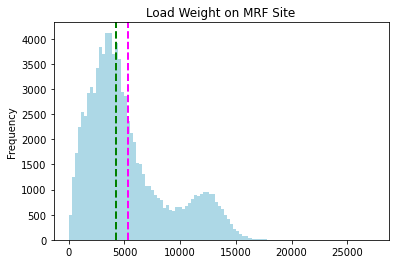

In [33]:
csite_load_weight = csite_df['load_weight']
csite_load_weight.plot.hist(title='Load Weight on MRF Site', color='lightblue', bins=100) #there are 100 grouping 
plt.axvline(csite_load_weight.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(csite_load_weight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Based on the diagram we able to see the min, mean, median, mode, and max. There is skewness which make the diagram not symetrical. The data gathering at the left side of diagram, the mean is greater than median, and the tail heading to the right. It can be concluded the data is right skewed. For now median can be use to indicate the lower an upper limit if necessary. We need to calculate the skewness and Kurtosis to give the information about those skewness even we can figure it out on the diagram. 

In [34]:
print('Skewness: ' + str(csite_df['load_weight'].skew()))
print('Kurtosis: ' + str(csite_df['load_weight'].kurt()))

Skewness: 1.0031737648633852
Kurtosis: 0.16775332641772112


 Since the larger the bin, the range of grouping getting shorter we choose 100. This 100 is just random number and hoping the visualization can still being understand. Below is the range of each bins and their frequency. B

In [35]:
n, bins = np.histogram(csite_load_weight, bins=100)
for ii in range(0, len(n)):
    print('Bins Border - ' , ii, ': ', bins[ii], ' - ', bins[ii+1], '\t', ' Frequency : ', n[ii])

Bins Border -  0 :  20.0  -  293.0 	  Frequency :  500
Bins Border -  1 :  293.0  -  566.0 	  Frequency :  1255
Bins Border -  2 :  566.0  -  839.0 	  Frequency :  1722
Bins Border -  3 :  839.0  -  1112.0 	  Frequency :  2254
Bins Border -  4 :  1112.0  -  1385.0 	  Frequency :  2541
Bins Border -  5 :  1385.0  -  1658.0 	  Frequency :  2467
Bins Border -  6 :  1658.0  -  1931.0 	  Frequency :  2926
Bins Border -  7 :  1931.0  -  2204.0 	  Frequency :  3046
Bins Border -  8 :  2204.0  -  2477.0 	  Frequency :  2921
Bins Border -  9 :  2477.0  -  2750.0 	  Frequency :  3416
Bins Border -  10 :  2750.0  -  3023.0 	  Frequency :  3846
Bins Border -  11 :  3023.0  -  3296.0 	  Frequency :  3709
Bins Border -  12 :  3296.0  -  3569.0 	  Frequency :  4124
Bins Border -  13 :  3569.0  -  3842.0 	  Frequency :  4124
Bins Border -  14 :  3842.0  -  4115.0 	  Frequency :  3704
Bins Border -  15 :  4115.0  -  4388.0 	  Frequency :  3915
Bins Border -  16 :  4388.0  -  4661.0 	  Frequency :  3598

Because of thousand of datas, we cannot see if there are any outlier clearly. To resolve this, we can change the plot kind from 'bar' into 'box'. Here are the results

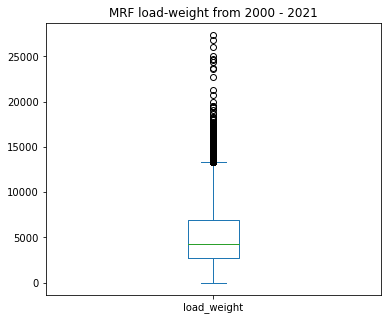

In [36]:
csite_df['load_weight'].plot(kind='box', title='MRF load-weight from 2000 - 2021', figsize=(6,5))
plt.show()

In [37]:
 csite_skewness = str(csite_df['load_weight'].skew())

`There are a lot of outlier inside the data. Previously we already figured the skewness of the data. Soon we will censor the data to getting rid of outliers value. We obtained the skewness = `1.0031737648633852` (greater than 1) means the data are highly skewed.`

It seems there are no lower outlier detected so the lower boundary calculation is ignored. To calculate the IQR and Upper boundaries:

In [38]:
csite_q3, csite_q1 = np.percentile(csite_df['load_weight'], [75 ,25])
csite_iqr = csite_q3 - csite_q1
print('The IQR is : ', csite_iqr)

The IQR is :  4240.0


In [39]:
max_csite_iqr = csite_q3 + 1.5 * csite_iqr
print('The Upper Boundaries : ', max_csite_iqr)

The Upper Boundaries :  13300.0


In [40]:
#in case needed for the lower
#min_csite_iqr = csite_q1 - 1.5 * csite_iqr

Because the upper boundaries is calculated, we can change the value which have the value more than `13300.0`. For further process, drop all of the outlier value with Upper Boundaries.

In [41]:
csite_df.sort_values(by='load_weight', ascending=True)

,load_time,load_type,load_weight,dropoff_site
9729,2019-01-18 02:01:00+00:00,TIRES,20.0,MRF
48210,2006-09-19 06:37:00+00:00,RECYCLING - PAPER,20.0,MRF
48965,2005-11-15 01:18:00+00:00,RECYCLING - PAPER,20.0,MRF
36857,2006-09-04 01:39:00+00:00,RECYCLING - COMINGLE,20.0,MRF
20822,2005-08-05 03:29:00+00:00,RECYCLING - PAPER,20.0,MRF
...,...,...,...,...
89606,2006-01-11 02:34:00+00:00,RECYCLED METAL,24680.0,MRF
89597,2006-01-10 09:14:00+00:00,RECYCLED METAL,25100.0,MRF
89548,2006-01-10 11:04:00+00:00,RECYCLED METAL,26000.0,MRF
89608,2006-01-10 02:30:00+00:00,RECYCLED METAL,26860.0,MRF


In [42]:
sorted_csite_df = csite_df.sort_values(by='load_weight', ascending=True)

Try to trim the outliers by dropping the certain rows which has load weight more than upper boundaries values.

In [43]:
sorted_csite_df.drop(sorted_csite_df[sorted_csite_df['load_weight'] > max_csite_iqr].index, inplace = True)

In [44]:
#Try to censor the outliers by replace the certain rows which has load weight values more than upper boundaries with those upper boundaries values.
#sorted_csite_df.loc[sorted_csite_df.load_weight > max_csite_iqr, 'load_weight'] = max_csite_iqr

These are the result of the data which have been updated.

In [45]:
sorted_csite_df

,load_time,load_type,load_weight,dropoff_site
9729,2019-01-18 02:01:00+00:00,TIRES,20.0,MRF
48210,2006-09-19 06:37:00+00:00,RECYCLING - PAPER,20.0,MRF
48965,2005-11-15 01:18:00+00:00,RECYCLING - PAPER,20.0,MRF
36857,2006-09-04 01:39:00+00:00,RECYCLING - COMINGLE,20.0,MRF
20822,2005-08-05 03:29:00+00:00,RECYCLING - PAPER,20.0,MRF
...,...,...,...,...
84170,2010-09-07 11:01:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF
71578,2009-09-25 10:50:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF
72485,2009-10-01 10:45:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF
69035,2010-10-15 10:22:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF


Next, visualize it to recognize whether any outlier from the updated data.

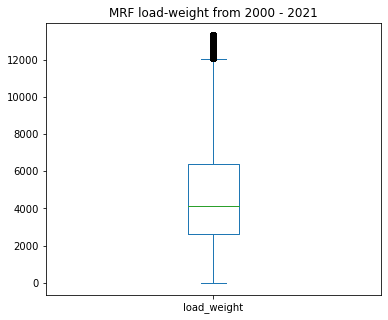

In [46]:
sorted_csite_df['load_weight'].plot(kind='box', title='MRF load-weight from 2000 - 2021', figsize=(6,5))
plt.show()

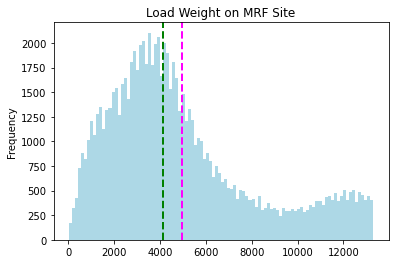

In [47]:
csites_load_weight = sorted_csite_df['load_weight']
csites_load_weight.plot.hist(title='Load Weight on MRF Site', color='lightblue', bins=100) #there are 100 grouping 
plt.axvline(csites_load_weight.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(csites_load_weight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Apparently there are still outlier from boxtool diagram and a  lot extreme data still remain. it caused by the outliner values has been changed to upper boundaries which caused the frequency of that values also canged. Others change which affected data iare shown from desciption below.

In [48]:
sorted_csite_df.describe()

,load_weight
count,85928.000000
mean,4944.448457
std,3245.876093
min,20.000000
25%,2620.000000
50%,4140.000000
75%,6400.000000
max,13300.000000


In [49]:
df.describe()

,load_weight
count,90129.000000
mean,5358.078654
std,3727.742388
min,20.000000
25%,2720.000000
50%,4280.000000
75%,7020.000000
max,75000.000000


`After we comparing the Central Tendency, all of the value except the max has been change. It is because the number of data has been change and the maximun value also change. This is the effect of using trimming to resolved the outlier.`

#### 6. Using the selected site to calculate the range, variance, and standard deviation for the load_weight data.
Note : Provide insight from the results of your calculations to the city government (Make sure the data used is data that has been cleaned of outliers).

In [50]:
updated_csite_df = sorted_csite_df.copy()
updated_csite_df

,load_time,load_type,load_weight,dropoff_site
9729,2019-01-18 02:01:00+00:00,TIRES,20.0,MRF
48210,2006-09-19 06:37:00+00:00,RECYCLING - PAPER,20.0,MRF
48965,2005-11-15 01:18:00+00:00,RECYCLING - PAPER,20.0,MRF
36857,2006-09-04 01:39:00+00:00,RECYCLING - COMINGLE,20.0,MRF
20822,2005-08-05 03:29:00+00:00,RECYCLING - PAPER,20.0,MRF
...,...,...,...,...
84170,2010-09-07 11:01:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF
71578,2009-09-25 10:50:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF
72485,2009-10-01 10:45:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF
69035,2010-10-15 10:22:00+00:00,RECYCLING - SINGLE STREAM,13300.0,MRF


Calculating the Range for updated choosen site without outliner so the max are based on upper boundaries load weight.

In [51]:
range_csite = updated_csite_df['load_weight'].max() - updated_csite_df['load_weight'].min()
print (f'Range : {range_csite}')

Range : 13280.0


Then calculate the variance based on each value, mean of sample, and total of sample.

In [52]:
var_csite = updated_csite_df['load_weight'].var()
print (f'Variance : {var_csite}')

Variance : 10535711.612830717


In [53]:
std_csite = updated_csite_df['load_weight'].std()
print (f'Standard Deviation : {std_csite}')

Standard Deviation : 3245.8760932652244


Both variances and Standard deviation expressed the variability of the data but standard deviation more close to the actual value. Using the Standard Deviation is a way of knowing what is normal, and what is extra from the data. We able to concluded there are extras load weight from the figure below.

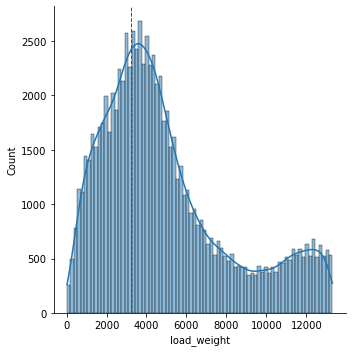

In [54]:
sns.displot(updated_csite_df['load_weight'], kde=True, label='Standard deviation on the Data')
plt.axvline(updated_csite_df['load_weight'].std(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [55]:
#updated_csite_df['load_weight'].plot.hist(title='Load Weight on MRF Site', color='lightblue', bins=100) 
#plt.axvline(updated_csite_df['load_weight'].std(), color='blue', linestyle='dashed', linewidth=1)
#plt.show()

`Our insight is there are irregularity on the this site especially on the load weight. Most of the waste diversed to this site. MRF accommodates all kinds of waste and most active. This is can cause a dense amount of waste in  and bottleneck that area. Somehow we need to limit the amount if the waste in the future for MRF.`

#### 7. The city government plans to add a new site. Providing analysis and suggestions regarding the storage capacity at the new site based on the calculation of the confidence interval. 
Note : What data do you use, is it only from one site or from the whole site?

We calculate the convidence interval of our updated site data (MRF) along with other site. In our case, the researchers suggested to use a confidence interval of 95 percent. Calculating confidence Intervals using the Normal Distribution because the number of sample is more than 30. In here we will comparing the interval between all the site.

In [56]:
#stats.norm.interval(alpha=0.95, loc=np.mean(updated_csite_df['load_weight']),scale=stats.sem(updated_csite_df['load_weight']))

In [57]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [58]:
print("MRF Mean and Confidence Interval :")
mean_confidence_interval(updated_csite_df['load_weight'], confidence=0.95)

MRF Mean and Confidence Interval :


(4944.448456847594, 4922.745505643748, 4966.151408051439)

<AxesSubplot:ylabel='Density'>

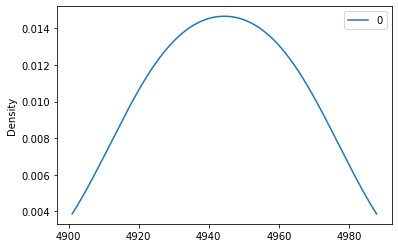

In [59]:
pd.DataFrame(mean_confidence_interval(updated_csite_df['load_weight'], confidence=0.95)).plot(kind="density", figsize=(6,4))

In [60]:
print("ELMONT Mean and Confidence Interval :")
mean_confidence_interval(df_1['load_weight'], confidence=0.95)

ELMONT Mean and Confidence Interval :


(15303.4, 3026.4477483322444, 27580.352251667755)

In [61]:
print("KRAMER Mean and Confidence Interval :")
mean_confidence_interval(df_2['load_weight'], confidence=0.95)

KRAMER Mean and Confidence Interval :


(11660.0, -7749.1769649226735, 31069.176964922674)

In [62]:
print("WILCAB Mean and Confidence Interval :")
mean_confidence_interval(df_4['load_weight'], confidence=0.95)

WILCAB Mean and Confidence Interval :


(11022.222222222223, 5782.733381904442, 16261.711062540004)

In [63]:
print("ZILKER Mean and Confidence Interval :")
mean_confidence_interval(df_5['load_weight'], confidence=0.95)

ZILKER Mean and Confidence Interval :


(11222.3125, 10780.038157282384, 11664.586842717616)

`As the data scientist, we are not suggesting adding compeletely new site. Based on the analysis we only need to distributed the waste fairly to other site. The only busy site currently are MRF and ZILKER while other such as ELMONT, KRAMER, and WILCAB only perform diversion that can be counted with the fingers in that 2 decades. So in that situation we can split the capacity for each site. We only need to add several amount of load copacity to fulfill these diggerence. It also can handle the bottleneck problem. `

In [64]:
#df[(df['dropoff_site'] == 'MRF')].sort_values(by='load_time', ascending=False)

#### 8. Make a hypothesis test analysis of the data from the available data (the case is acquitted). 
Note : Define H0 and H1 and perform calculations using a t-test that matches your hypothesis. Write the conclusion from your calculation to the city government (Remember! the city government doesn't understand p-value, hypothesis is accepted/not accepted).

`Is it really necessary to split the part of load to ZILKAR? Considering it also loaded enough with the waste?". What should we measure to know is it significally similiar or not? If so we must handle the ZILKAR with same situation but if is not we can let the site as it is for now.`

In [65]:
updated_csite_df[(updated_csite_df['dropoff_site'] == 'MRF')].sort_values(by='load_time', ascending=False)

,load_time,load_type,load_weight,dropoff_site
9967,2021-07-11 07:07:05+00:00,TIRES,2120.0,MRF
23766,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,2900.0,MRF
22873,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,3500.0,MRF
36153,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,3640.0,MRF
46663,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,3400.0,MRF
...,...,...,...,...
21078,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2760.0,MRF
20901,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2940.0,MRF
53635,2004-08-30 01:40:00+00:00,RECYCLING - COMINGLE,4580.0,MRF
53702,2004-08-30 01:26:00+00:00,RECYCLING - PAPER,8580.0,MRF


As for starter, we perform data cleaning on ZILKER to make the data equally eligible with MRF.

In [66]:
c1site_df = df[(df['dropoff_site'] == 'ZILKER')].sort_values(by='load_weight', ascending=False)
c1site_df

,load_time,load_type,load_weight,dropoff_site
94689,2007-03-28 04:45:00+00:00,YARD TRIMMING,75000.0,ZILKER
94573,2008-05-27 10:50:00+00:00,YARD TRIMMING,22000.0,ZILKER
94232,2016-05-03 12:30:00+00:00,GARBAGE COLLECTIONS,21600.0,ZILKER
94466,2006-05-16 12:00:00+00:00,YARD TRIMMING,20000.0,ZILKER
94233,2018-07-11 12:41:00+00:00,GARBAGE COLLECTIONS,19000.0,ZILKER
...,...,...,...,...
94309,2007-04-06 05:00:00+00:00,YARD TRIMMING,2000.0,ZILKER
94534,2008-04-15 01:40:00+00:00,YARD TRIMMING,1750.0,ZILKER
94181,2006-05-24 05:00:00+00:00,BRUSH,1640.0,ZILKER
94755,2008-03-28 02:00:00+00:00,YARD TRIMMING,1550.0,ZILKER


In [67]:
print('Skewness: ' + str(c1site_df['load_weight'].skew()))
print('Kurtosis: ' + str(c1site_df['load_weight'].kurt()))

Skewness: 1.667144687707162
Kurtosis: 21.02099454203747


There is one extreme found on the box tool according to the figure.

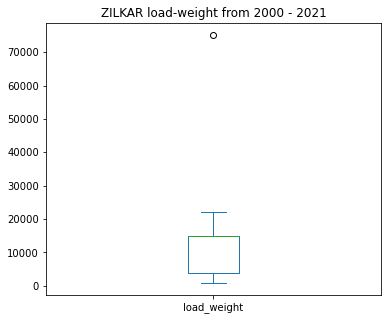

In [68]:
c1site_df['load_weight'].plot(kind='box', title='ZILKAR load-weight from 2000 - 2021', figsize=(6,5))
plt.show()

In [69]:
c1site_q3, c1site_q1 = np.percentile(c1site_df['load_weight'], [75 ,25])
c1site_iqr = c1site_q3 - c1site_q1
print('The IQR is : ', c1site_iqr)

The IQR is :  11000.0


In [70]:
max_c1site_iqr = c1site_q3 + 1.5 * c1site_iqr
print('The Upper Boundaries : ', max_c1site_iqr)

The Upper Boundaries :  31500.0


Next, perform trimming method similiar with MRF.

In [71]:
c1site_df.drop(c1site_df[c1site_df['load_weight'] > max_c1site_iqr].index, inplace = True)

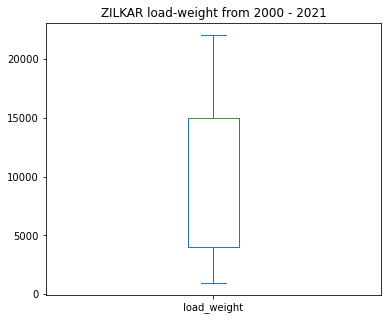

In [72]:
c1site_df['load_weight'].plot(kind='box', title='ZILKAR load-weight from 2000 - 2021', figsize=(6,5))
plt.show()

Then we see whether the MRF and ZILKER sites differ significantly. We can see the p-value then compare it with Alpha.

In [73]:
site1 = pd.DataFrame(updated_csite_df['load_weight'])
site2 = pd.DataFrame(c1site_df['load_weight'])

In [74]:
site2

,load_weight
94573,22000.0
94232,21600.0
94466,20000.0
94233,19000.0
94496,18000.0
...,...
94309,2000.0
94534,1750.0
94181,1640.0
94755,1550.0


Our hypothesis on this case:

**H0: μ_site1 = μ_site2**

**H1: μ_site1 != μ_site2**

In [75]:
t_stat, p_val = stats.ttest_ind(site1 ,site2)

print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.0
t-statistics: -48.26129783539742


/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


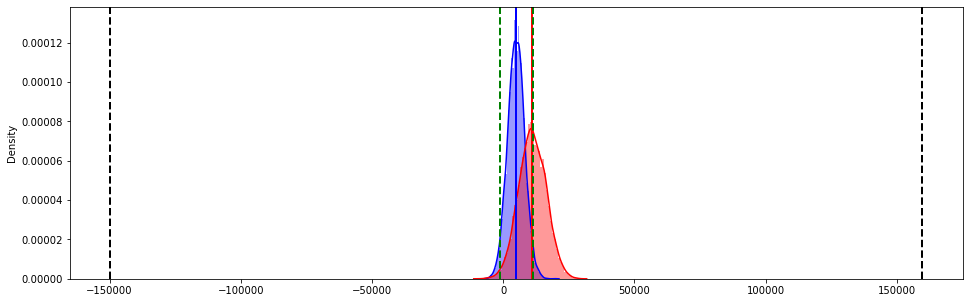

In [76]:
site1_pop = np.random.normal(site1['load_weight'].mean(),site1['load_weight'].std(),10000)
site2_pop = np.random.normal(site2['load_weight'].mean(),site2['load_weight'].std(),10000)

ci = stats.norm.interval(0.95, site1['load_weight'].mean(), site1['load_weight'].std())
plt.figure(figsize=(16,5))
sns.distplot(site1_pop, label='MRF',color='blue')
sns.distplot(site2_pop, label='ZILKER',color='red')

plt.axvline(site1['load_weight'].mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(site2['load_weight'].mean(), color='red',  linewidth=2, label='Germany mean')
#c[0] = batas bawah, c[1]=batas atas
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(site1_pop.mean()+t_stat[0]*site1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(site1_pop.mean()-t_stat[0]*site1_pop.std(), color='black', linestyle='dashed', linewidth=2)


`The result is eject the H0, Wich make MRF and ZILKAR significally different.`

#### 9. Drawing the red thread and conclusions from the calculations and analyzes that have done in the previous steps. 
Share your conclusions with the city government and avoid technical language that non-data scientists don't understand!

`Previously we try to investigate why MRF is so popular now we know why because this site the only active until now. So as for government we need to deactivate another site so we won't spending another bucks to buy any land. Why we have that much of site but only MRF which still active until 2021? Based on the report of those site still empty but the facility inadequate like on the MR. If handling to much site is too much we can choose to several sites to functioning.For example MFR handling 1000-6000 load weight, then the rest must handling more or lest than that load. Do not forget we also must rerun ZILKAR site as it is to carrying another load for MRF. if  the cost of gas and distance affecting those factors, we must resolve this situation. And if those site close because of waste were leave as it is so that it has crossed the capacity limit means we have to promote the movement to minimize waste or create new policies until this is problem is solved.`

### Problem 2

### Answering the Following Questions:

#### 1. What is the difference between descriptive and inferential statistics?

`According to (Peck, Olsen, & Devore, 2012), The descriptive statistics is part of statistics which methods to organizing and summarizing data. On the other hand, inferential statistics also part of statistics which deals with generalizations from samples to the population from which they were selected and evaluating the reliability of such generalizations. Data description and statistical inference are both processes of data analysis after data has been collected as required. In descriptive statistics, we organize and summarizing data, such as the use of tables, graphs, or numerical summaries. In Inferential Statistics, the task is to generalizes the sample obtained to represent a population because it is impossible to obtain the entire population data. This type of generalization can put researcher at risk for drawing the wrong conclusions about the population because it is based on insufficient data (Peck, Olsen, & Devore, 2012).`

#### 2. What metric on the central tendency is appropriate to use to conclude that the data are normally distributed and not? Is it the same or different?

`There are 3 metrics on the central tendency, there are the mode, the median, and the mean. Median and mean is often use to determining the central value while mode is often used in categorical data (Rees, 2018). Since it 'Central' usually it is indeed affected the use of mean or median based on the data type (normal distribution or skewed) according of their data shape. In normal distribution, the mean is primary used but more symmetrical the distribution, The mean, median, and mode are almost similiar or equal which make it very rare (but not impossible) (Rees, 2018). Mean also can being considered more precised because it contains all data values including those median and mode so that is the reason why mean more favourable for symmetrical data. But as the noted every change affect the mean so it is not suggested to use the mean on skewed data (Statistics, n.d.). In skewed data, the median is often used. The reason is becaused the unbalanced data distribution so if there is any change, median would not be affected like mean (Rees, 2018). Those are the reason why why the usage of those metrics not same between the data shape. But we can always use both in case there are any doubt (Rees, 2018).`

#### 3. What technique did you choose for handling outliers? explain why!

`By using boxplot based on Tukey method (1977) especially trimming. The reason is when I use trimming, there is no clumping on the right side unlike censoring which I tested before. In trimming we deleted several row and data quantity change and affected the entire mean, Q1, median, Q3, and max so the upper boundaries also changed. As for censoring, it removed the outlier because of IQR only affected the 1st quartile and 3rd quartile and it happened from the data case that the quantity of the data does not change which make the median not shifting so the updated data have no outlier. But in censoring there is extreme outlier which make the data far becoming normal.`


#### 4. What is the concept behind central tendency that we can use to complete step 7?

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/500px-Standard_deviation_diagram.svg.png'>

`In Central Tendency there are mean, median, quartiles, and mode. Confidence Interval (CI) asissts us to obtain the lower and upper limit as estimation but with precentage of confidence. The middle value are important in this CI because it based on mean and the range determined by plus and minus of variance. On 7th steps, we determined all CI of sites then picturing all the value together as one graph. Then we finding the right capacity based on mean on each sites`

#### 5. Explain what type of hypothesis testing did you apply and why?

`Two Samples Independent Two Tailed Hypothesis Testing, the reason is because we want to compare between to independent data especially these both from different site and quantity but have similiar variable to measure (weight load). `

### Conclusions, Assumptions, Overall Analysis
Based on the analysis above, the problem can be solved and these are the answere:

3. Based on the central tendency (mean, median, and mode) for each site, what insights/information can you convey to the city government?

`Currently we have 5 sites. The MRF has average of 5313.77 load weight in 2 decades while the largest is ELMONT with 15303. The highest the number doesn’t mean it is the problem because the only active right now is MRF. MRF has variety of load weight from only 20 to 2732. While the largest been dropping 5480 until 31857 but. only doing diversion for 5 times`

4. Choosing the site that interestsing the most, and give a reason.

`The site I chose to analyze is MRF. The reason is the site has the most diversion among all sites with various type of load type. We should investigate why this MRF is so popular and are there any values that influence this situation.`


5. Checking whether the load_weight data has outliers or not. Use the right 
`technique according to the distribution of the data. If so, what is the percentage of the number of outliers? and compare the central tendency of data that has outliers removed with those that have not.

`Yes, It has several outliers. There are a lot of outlier inside the data. Previously we already figured the skewness of the data. Soon we will censor the data to getting rid of outliers value. We obtained the skewness = `1.0031737648633852` (greater than 1) means the data are highly skewed.`
`After we comparing the Central Tendency, all of the value except the max has been change. It is because the number of data has been change and the maximun value also change. This is the effect of using trimming to resolved the outlier.`

6. Use the to calculate the range, variance, and standard deviation for the load_weight data. Provide insight from the results of the calculations to the city government.

`Our insight is there are irregularity on the this site especially on the load weight. Most of the waste diversed to this site. MRF accommodates all kinds of waste and most active. This is can cause a dense amount of waste in  and bottleneck that area. Somehow we need to limit the amount if the waste in the future for MRF.`



7. Providinh analysis and suggestions regarding the amount of storage capacity at the new site based on the calculation of the confidence interval. What data do we use, is it only from one site or from the whole site?

`As the data scientist, we are not suggesting adding compeletely new site. Based on the analysis we only need to distributed the waste fairly to other site. The only busy site currently are MRF and ZILKER while other such as ELMONT, KRAMER, and WILCAB only perform diversion that can be counted with the fingers in that 2 decades. So in that situation we can split the capacity for each site. We only need to add several amount of load copacity to fulfill these diggerence. It also can handle the bottleneck problem. `


8. Make a hypothesis test analysis of the data from the available data (the case is acquitted). Write the conclusion from your calculation to the city government.

`Is it really necessary to split the part of load to ZILKAR? Considering it also loaded enough with the waste?". What should we measure to know is it significally similiar or not? If so we must handle the ZILKAR with same situation but if is not we can let the site as it is for now.`
`The result is eject the H0, Wich make MRF and ZILKAR significally different.`


9. Drawing a common thread and draw conclusions from the calculations and analyzes in the previous steps. 

`Previously we try to investigate why MRF is so popular now we know why because this site the only active until now. So as for government we need to deactivate another site so we won't spending another bucks to buy any land. Why we have that much of site but only MRF which still active until 2021? Based on the report of those site still empty but the facility inadequate like on the MR. If handling to much site is too much we can choose to several sites to functioning.For example MFR handling 1000-6000 load weight, then the rest must handling more or lest than that load. Do not forget we also must rerun ZILKAR site as it is to carrying another load for MRF. if  the cost of gas and distance affecting those factors, we must resolve this situation. And if those site close because of waste were leave as it is so that it has crossed the capacity limit means we have to promote the movement to minimize waste or create new policies until this is problem is solved.`



### REFERENCES 

1. Peck, R., Olsen, C., & Devore, J. (2012). Introduction to Statistics & Data Analysis (4th Edition). Boston, Masachusetts: Cengage Learning.
2. Rees, D. (2018). Essential Statistics. CRC Press. Retrieved from : https://www.google.co.id/books/edition/Essential_Statistics/KU1ZDwAAQBAJ?hl=id&gbpv=1&dq=when+we+use+mean,+median+and+mode&pg=PA36&printsec=frontcover
3. Statistics, L. (n.d.). Measures of Central Tendency. Retrieved from Laerd Statistics: https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php
4. Tukey, JW. Exploratory data analysis. Addison-Wesely, 1977
